In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [8]:
# 데이터 로드
file_path = '/Users/imdaegyeong/Desktop/파이썬 연습장/xgboost/Train.csv'
data = pd.read_csv(file_path)

data


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100,160,1.6000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,83,4.1500,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,99,150,1.5151,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,40,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,234,19.5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,1,1,2.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1759,40,200,5.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1760,96,218,2.2708,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1761,16,81,5.0625,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# 결측치 찾기.
missing_values = data.isnull().sum()
missing_values_summary = missing_values[missing_values > 0]

duplicate_rows = data.duplicated().sum()

missing_values_summary, duplicate_rows


(Series([], dtype: int64), 48)

> 결측치는 없고 중복된 행 48개 존재.

In [3]:
# 중복된 행 제거
data_cleaned = data.drop_duplicates()
data_cleaned.shape


(1715, 1559)

> 이상치 탐색

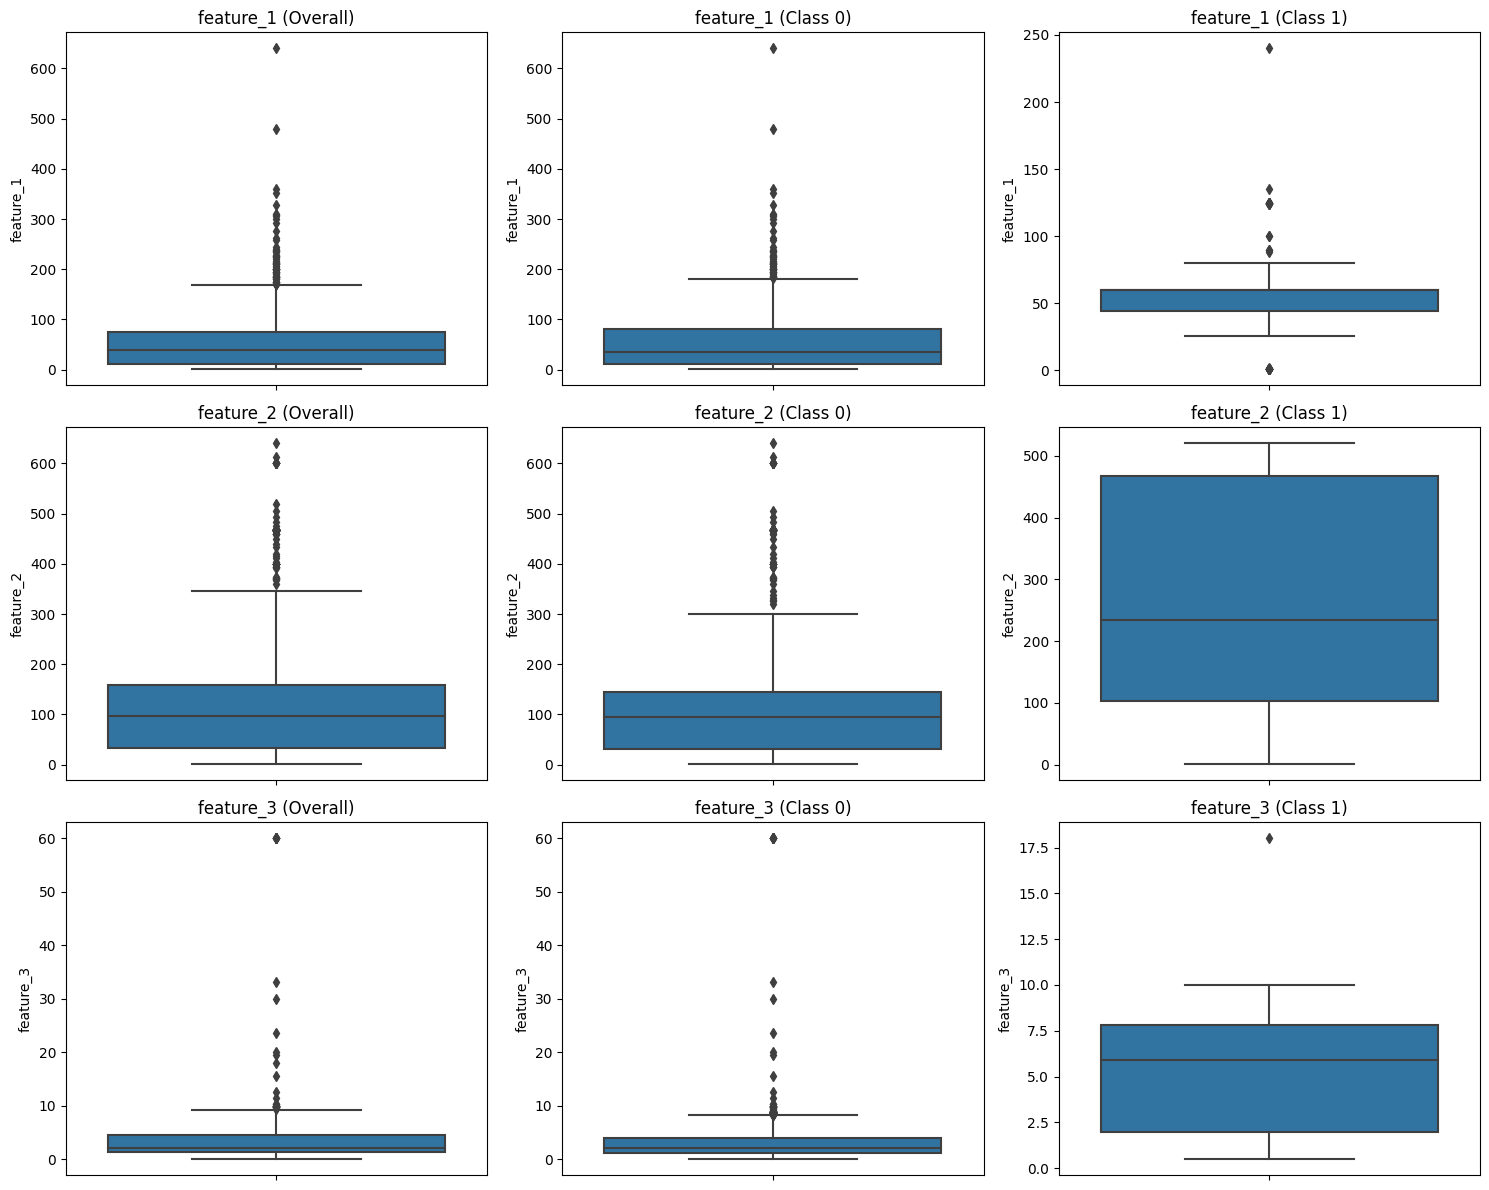

In [11]:
#이상치 탐색을 위한 box 플롯

# 연속형 feature 선택
features = ['feature_1', 'feature_2', 'feature_3']

# class 분류
class_0 = data[data['Class'] == 0]
class_1 = data[data['Class'] == 1]

# 박스 플롯 사용
plt.figure(figsize=(15, 12))

# 각 전체, 0, 1에 대해 박스 플롯 생성
for i, feature in enumerate(features):
    plt.subplot(3, 3, i*3 + 1)  # 전체
    sns.boxplot(y=data[feature])
    plt.title(f'{feature} (Overall)')

    plt.subplot(3, 3, i*3 + 2)  # 0
    sns.boxplot(y=class_0[feature])
    plt.title(f'{feature} (Class 0)')

    plt.subplot(3, 3, i*3 + 3)  # 1
    sns.boxplot(y=class_1[feature])
    plt.title(f'{feature} (Class 1)')

# 시각화
plt.tight_layout()
plt.show()


> t-test

In [12]:
from scipy.stats import ttest_ind

t_test_results = {}

# feature 1, 2, 3에 대해 Class 0과 Class 1 간의 t-검정 수행
for feature in features:
    t_stat, p_value = ttest_ind(class_0[feature], class_1[feature], equal_var=False)
    t_test_results[feature] = {'t_statistic': t_stat, 'p_value': p_value}

# t-검정 결과 출력
t_test_results


{'feature_1': {'t_statistic': -0.4063890530891288,
  'p_value': 0.6848582049187836},
 'feature_2': {'t_statistic': -9.813183388745246,
  'p_value': 6.6992942106095546e-18},
 'feature_3': {'t_statistic': -6.294176194242775,
  'p_value': 1.902549599493733e-09}}

In [13]:
# t-검정의 귀무가설 검정 결과 요약
alpha = 0.05  # 유의 수준 설정

# 귀무가설 검정 결과 저장을 위한 리스트 초기화
hypothesis_test_results = {}

# feature 1, 2, 3에 대해 귀무가설 검정 수행
for feature in features:
    p_value = t_test_results[feature]['p_value']
    
    if p_value < alpha:
        hypothesis_test_results[feature] = {
            'p_value': p_value,
            'null_hypothesis': 'Rejected',  # 귀무가설 기각
            'conclusion': '유의미한 차이가 있음'
        }
    else:
        hypothesis_test_results[feature] = {
            'p_value': p_value,
            'null_hypothesis': 'Not Rejected',  # 귀무가설 기각하지 않음
            'conclusion': '유의미한 차이가 없음'
        }

# 결과 출력
hypothesis_test_results


{'feature_1': {'p_value': 0.6848582049187836,
  'null_hypothesis': 'Not Rejected',
  'conclusion': '유의미한 차이가 없음'},
 'feature_2': {'p_value': 6.6992942106095546e-18,
  'null_hypothesis': 'Rejected',
  'conclusion': '유의미한 차이가 있음'},
 'feature_3': {'p_value': 1.902549599493733e-09,
  'null_hypothesis': 'Rejected',
  'conclusion': '유의미한 차이가 있음'}}

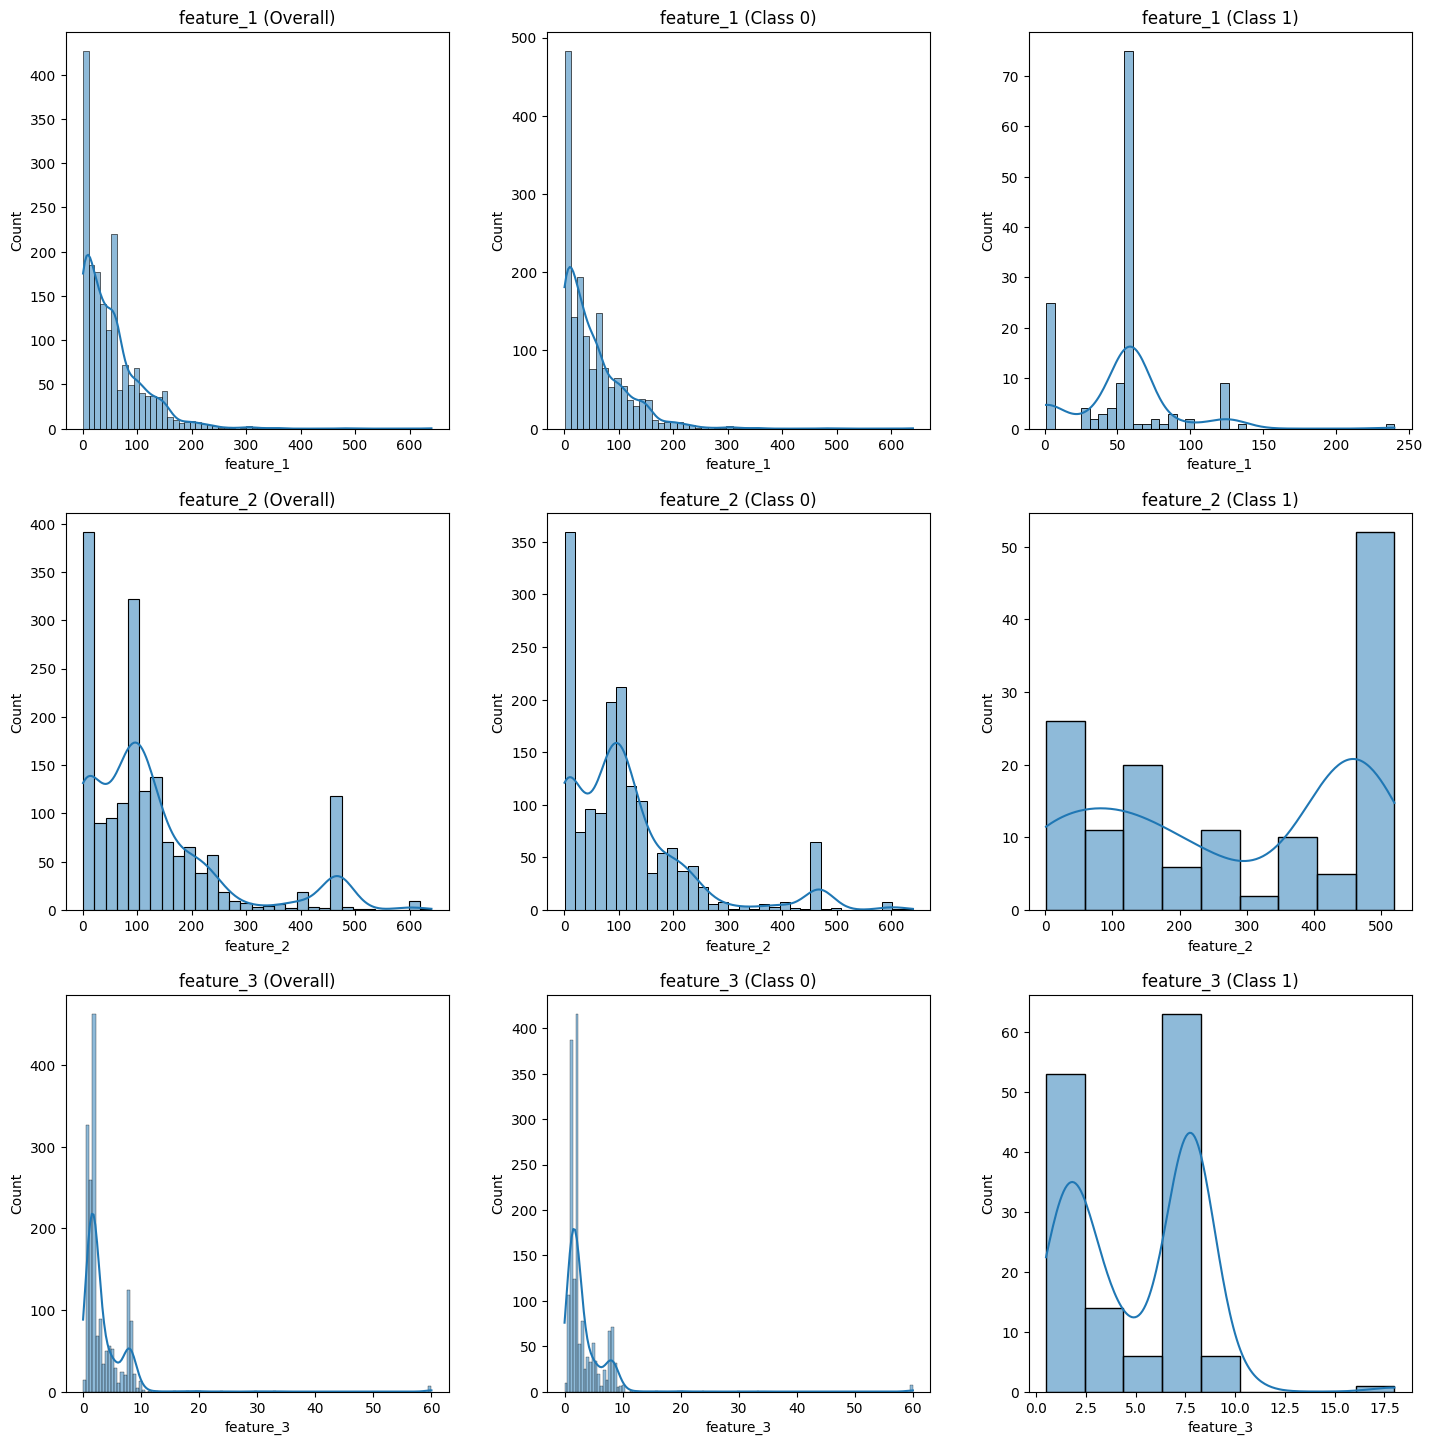

In [14]:
fig, axes = plt.subplots(len(features), 3, figsize=(15, 15))
fig.tight_layout(pad=4.0)

for i, feature in enumerate(features):
    # 전체 데이터에 대해 히스토그램 그리기
    sns.histplot(ax=axes[i, 0], data=data, x=feature, kde=True)
    axes[i, 0].set_title(f'{feature} (Overall)')

    # Class 0에 대해 히스토그램 그리기
    sns.histplot(ax=axes[i, 1], data=data[data['Class'] == 0], x=feature, kde=True)
    axes[i, 1].set_title(f'{feature} (Class 0)')

    # Class 1에 대해 히스토그램 그리기
    sns.histplot(ax=axes[i, 2], data=data[data['Class'] == 1], x=feature, kde=True)
    axes[i, 2].set_title(f'{feature} (Class 1)')

plt.show()

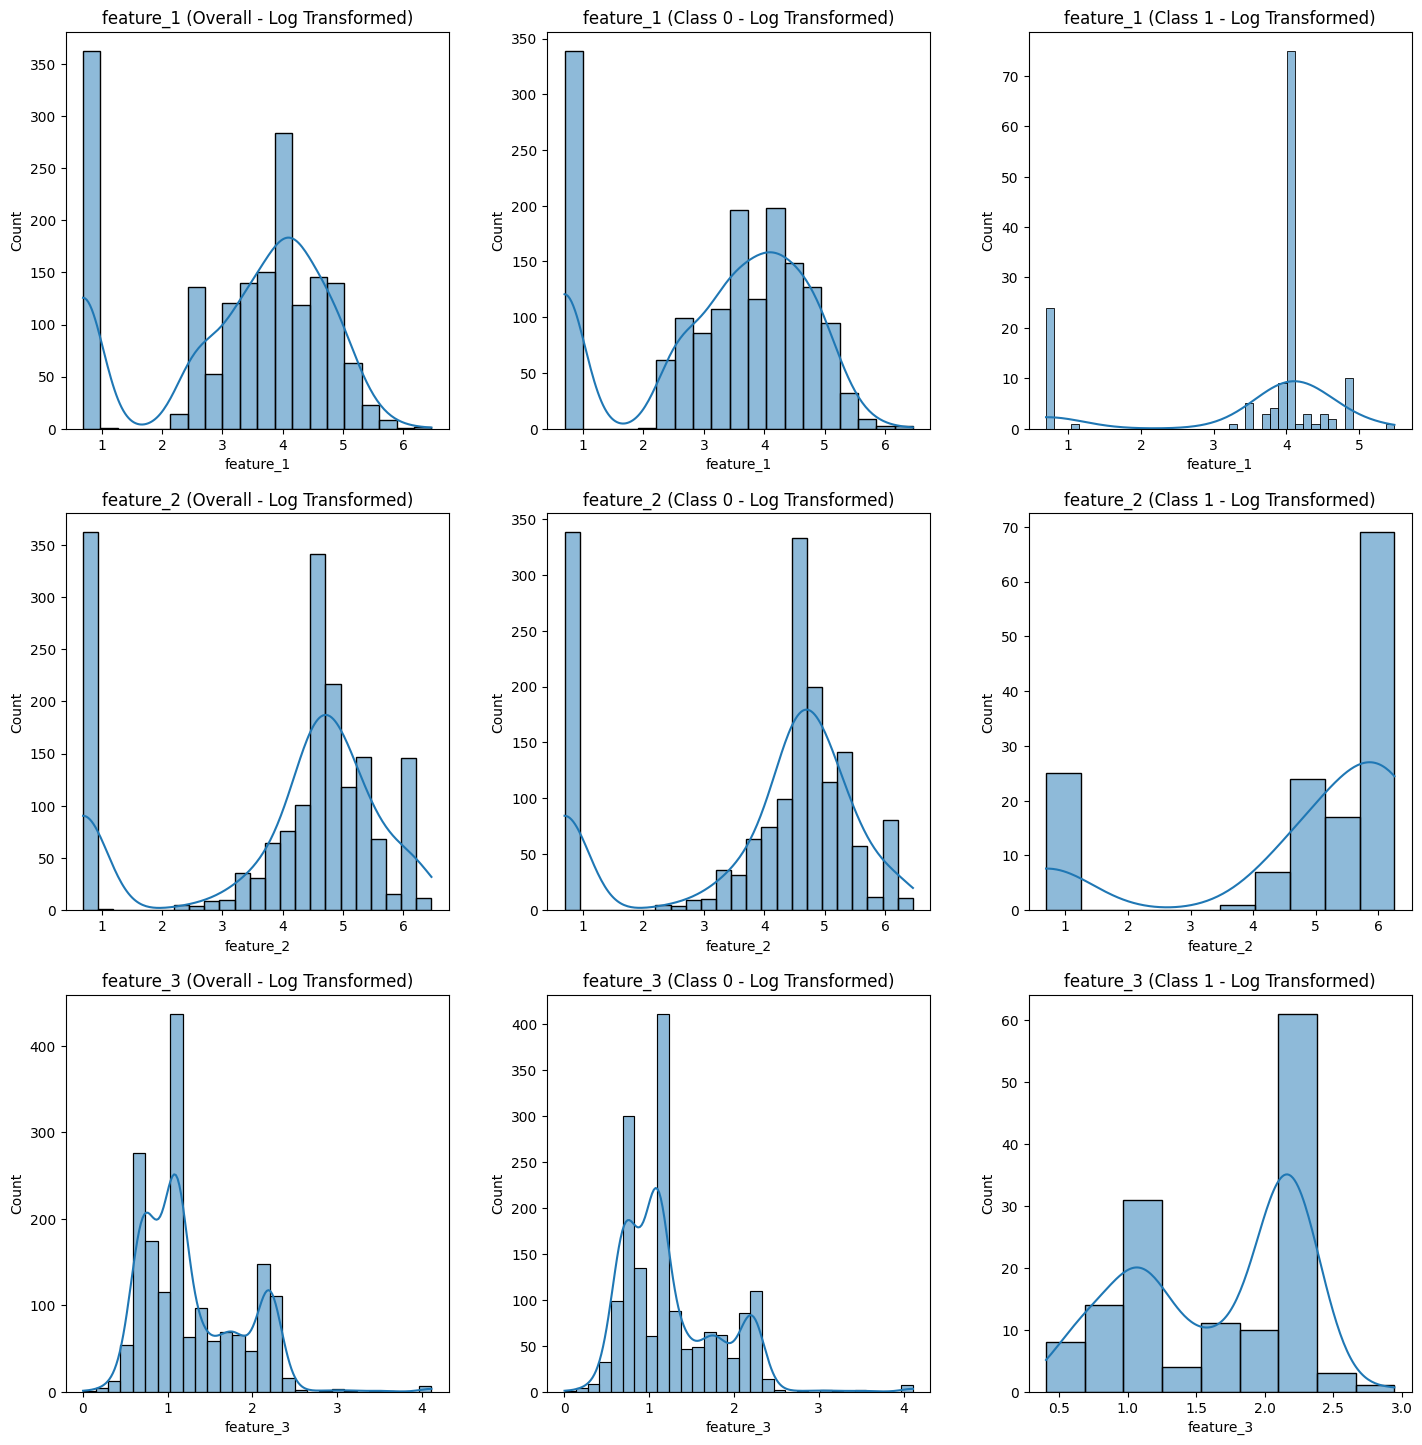

In [18]:
# feature 1, 2, 3에 대해 로그 변환 적용 (np.log1p 사용하여 값에 1을 더하고 로그를 취함)
data_log_transformed = data.copy()

for feature in features:
    data_log_transformed[feature] = np.log1p(data_log_transformed[feature])

# 로그 변환 후의 데이터 분포 시각화를 위해 다시 히스토그램 그리기
fig, axes = plt.subplots(len(features), 3, figsize=(15, 15))
fig.tight_layout(pad=4.0)

# 각 피처에 대해 전체, Class 0, Class 1의 히스토그램 그리기 (로그 변환 후)
for i, feature in enumerate(features):
    # 전체 데이터에 대해 히스토그램 그리기
    sns.histplot(ax=axes[i, 0], data=data_log_transformed, x=feature, kde=True)
    axes[i, 0].set_title(f'{feature} (Overall - Log Transformed)')

    # Class 0에 대해 히스토그램 그리기
    sns.histplot(ax=axes[i, 1], data=data_log_transformed[data_log_transformed['Class'] == 0], x=feature, kde=True)
    axes[i, 1].set_title(f'{feature} (Class 0 - Log Transformed)')

    # Class 1에 대해 히스토그램 그리기
    sns.histplot(ax=axes[i, 2], data=data_log_transformed[data_log_transformed['Class'] == 1], x=feature, kde=True)
    axes[i, 2].set_title(f'{feature} (Class 1 - Log Transformed)')

# 시각화
plt.show()


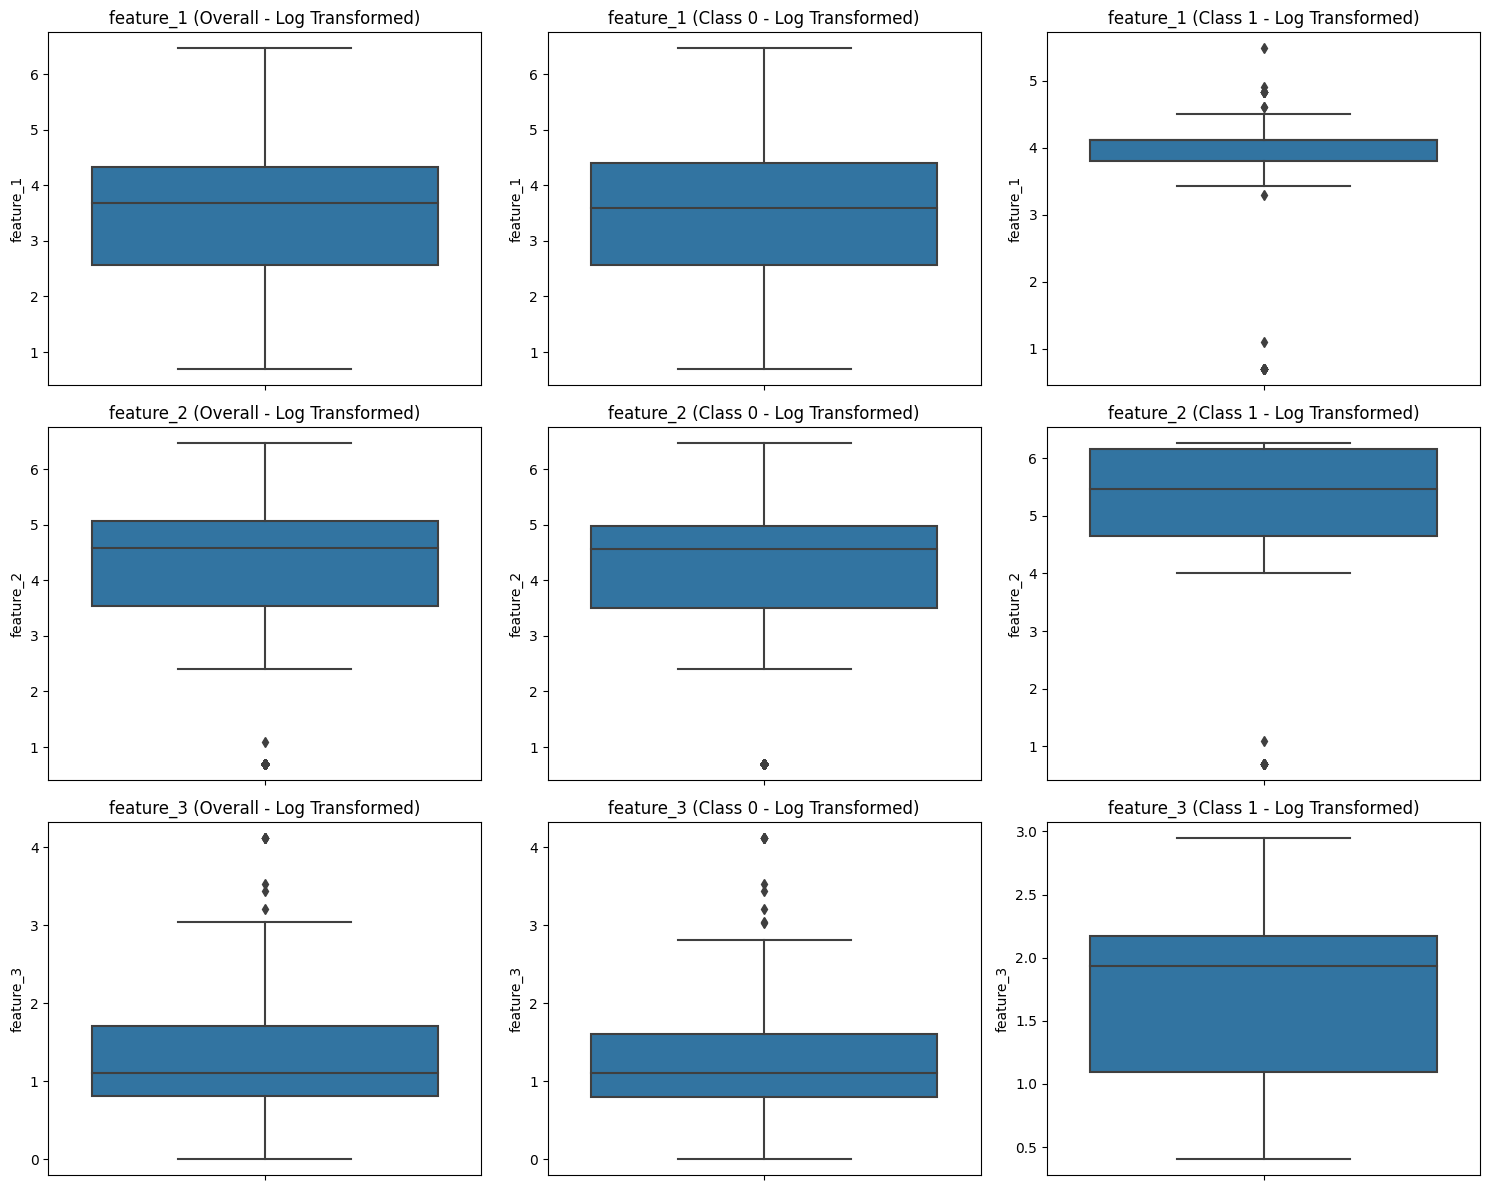

In [19]:
# 로그 변환된 데이터에서 이상치 탐색을 위한 박스 플롯 생성

# class 분류 (로그 변환된 데이터 사용)
class_0_log = data_log_transformed[data_log_transformed['Class'] == 0]
class_1_log = data_log_transformed[data_log_transformed['Class'] == 1]

# 박스 플롯 사용
plt.figure(figsize=(15, 12))

# 각 전체, Class 0, Class 1에 대해 박스 플롯 생성
for i, feature in enumerate(features):
    # 전체 데이터에 대한 박스 플롯
    plt.subplot(3, 3, i * 3 + 1)
    sns.boxplot(y=data_log_transformed[feature])
    plt.title(f'{feature} (Overall - Log Transformed)')

    # Class 0 데이터에 대한 박스 플롯
    plt.subplot(3, 3, i * 3 + 2)
    sns.boxplot(y=class_0_log[feature])
    plt.title(f'{feature} (Class 0 - Log Transformed)')

    # Class 1 데이터에 대한 박스 플롯
    plt.subplot(3, 3, i * 3 + 3)
    sns.boxplot(y=class_1_log[feature])
    plt.title(f'{feature} (Class 1 - Log Transformed)')

# 시각화
plt.tight_layout()
plt.show()


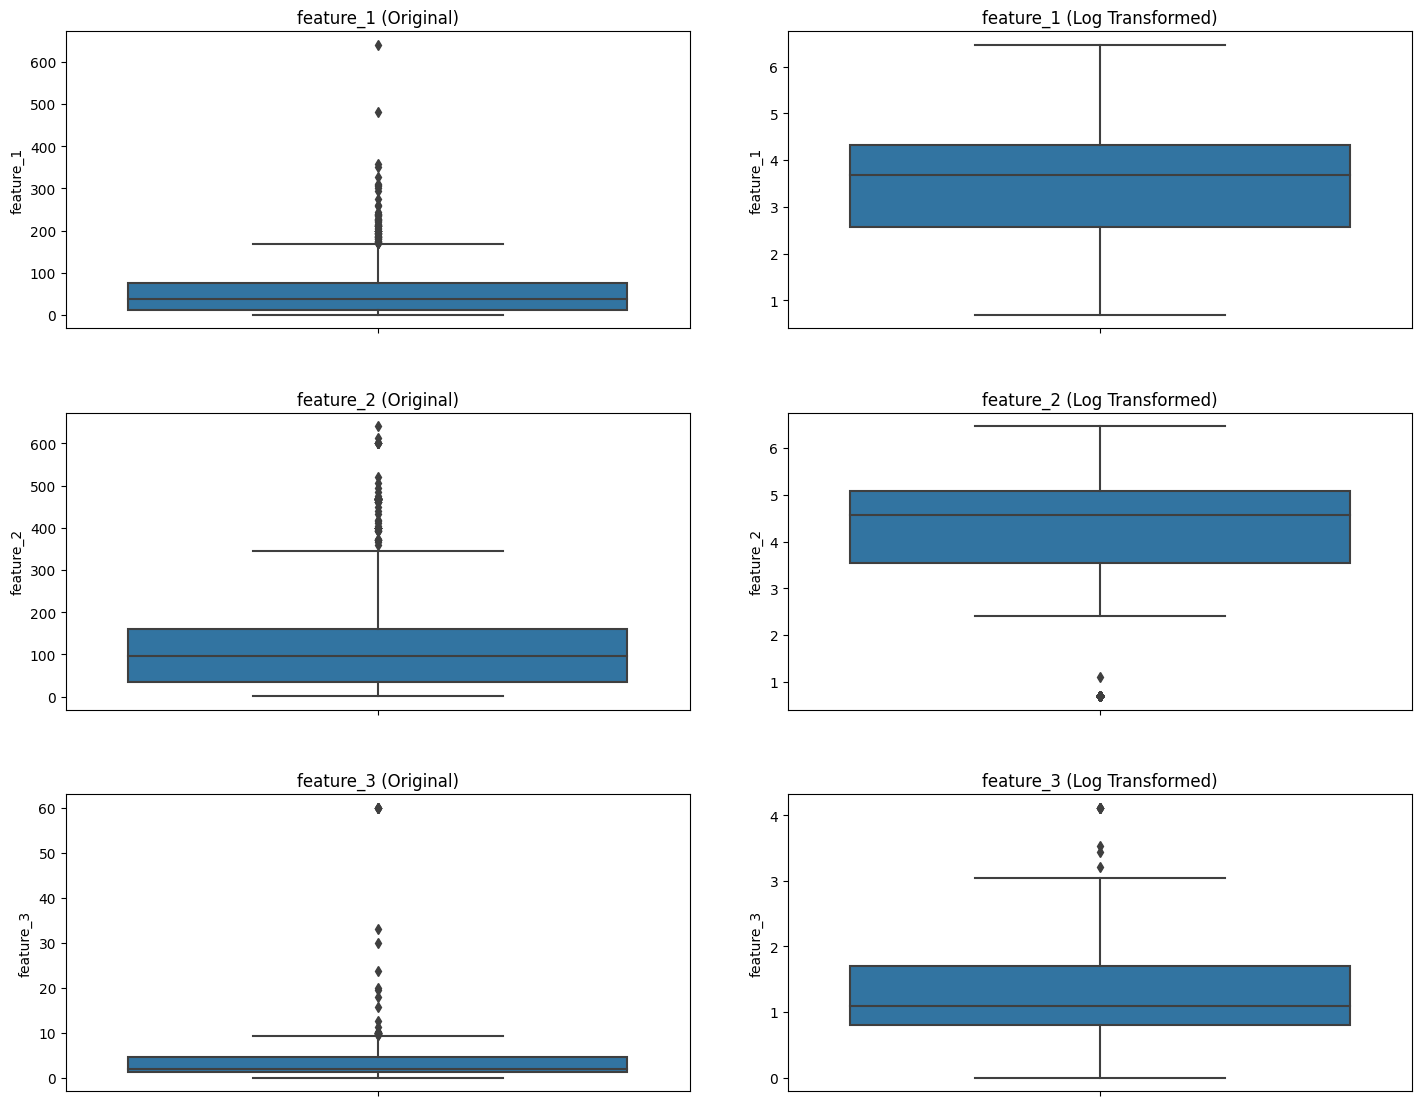

In [20]:
# 로그 변환 전과 후의 feature 1, 2, 3에 대한 박스 플롯 비교 시각화
fig, axes = plt.subplots(len(features), 2, figsize=(15, 12))
fig.tight_layout(pad=4.0)

# 각 피처에 대해 로그 변환 전과 후의 박스 플롯 생성
for i, feature in enumerate(features):
    # 로그 변환 전 전체 데이터에 대한 박스 플롯
    sns.boxplot(ax=axes[i, 0], y=data[feature])
    axes[i, 0].set_title(f'{feature} (Original)')

    # 로그 변환 후 전체 데이터에 대한 박스 플롯
    sns.boxplot(ax=axes[i, 1], y=data_log_transformed[feature])
    axes[i, 1].set_title(f'{feature} (Log Transformed)')

# 시각화
plt.show()


In [23]:
# Min-Max 정규화를 위해 MinMaxScaler 사용
from sklearn.preprocessing import MinMaxScaler

# Min-Max 정규화를 사용하여 feature들을 [0, 1] 범위로 변환
scaler = MinMaxScaler()

# 타겟 변수(Class)를 제외한 피처들만 스케일링
features_log_transformed = data_log_transformed.drop(columns=['Class'])
target = data_log_transformed['Class']

# 피처에 대해 Min-Max 정규화 적용
features_normalized = scaler.fit_transform(features_log_transformed)

# 정규화된 피처들을 데이터프레임으로 변환
features_normalized_df = pd.DataFrame(features_normalized, columns=features_log_transformed.columns)

# 정규화된 피처와 타겟 변수를 결합하여 최종 데이터셋 생성
data_normalized = pd.concat([features_normalized_df, target.reset_index(drop=True)], axis=1)

# 데이터 정규화 후 첫 5개 행을 직접 출력하여 확인
data_normalized.head()


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,0.679732,0.760545,0.232155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.407526,0.647790,0.398479,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,0.678007,0.749432,0.224076,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.523481,0.523481,0.168310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.324409,0.826089,0.734644,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [24]:
# 데이터셋에서 Class 0과 Class 1 분리 (샘플링 없이 전체 데이터 사용)
class_0 = data_normalized[data_normalized['Class'] == 0]
class_1 = data_normalized[data_normalized['Class'] == 1]

# t-검정 결과 저장을 위한 딕셔너리 초기화
t_test_results = {}

# feature_1, feature_2, feature_3에 대해 Class 0과 Class 1 간의 t-검정 수행
for feature in ['feature_1', 'feature_2', 'feature_3']:
    t_stat, p_value = ttest_ind(class_0[feature], class_1[feature], equal_var=False)
    t_test_results[feature] = {'t_statistic': t_stat, 'p_value': p_value}

# t-검정 결과 출력
t_test_results


{'feature_1': {'t_statistic': -2.6516848880933988,
  'p_value': 0.008746253527860886},
 'feature_2': {'t_statistic': -5.214065985153002,
  'p_value': 5.544843064885833e-07},
 'feature_3': {'t_statistic': -7.691891584404627,
  'p_value': 1.2426875882318075e-12}}

In [26]:
# 귀무가설 검정 결과 요약
alpha = 0.05  # 유의 수준 설정

# 귀무가설 검정 결과 저장을 위한 리스트 초기화
hypothesis_test_results = {}

# feature 1, 2, 3에 대해 귀무가설 검정 수행
for feature in t_test_results:
    p_value = t_test_results[feature]['p_value']
    
    if p_value < alpha:
        hypothesis_test_results[feature] = {
            'p_value': p_value,
            'null_hypothesis': 'Rejected',  # 귀무가설 기각
            'conclusion': '유의미한 차이가 있음'
        }
    else:
        hypothesis_test_results[feature] = {
            'p_value': p_value,
            'null_hypothesis': 'Not Rejected',  # 귀무가설 기각하지 않음
            'conclusion': '유의미한 차이가 없음'
        }

# 결과 출력
hypothesis_test_results


{'feature_1': {'p_value': 0.008746253527860886,
  'null_hypothesis': 'Rejected',
  'conclusion': '유의미한 차이가 있음'},
 'feature_2': {'p_value': 5.544843064885833e-07,
  'null_hypothesis': 'Rejected',
  'conclusion': '유의미한 차이가 있음'},
 'feature_3': {'p_value': 1.2426875882318075e-12,
  'null_hypothesis': 'Rejected',
  'conclusion': '유의미한 차이가 있음'}}